In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset_harga_beras.xlsx
/kaggle/input/dataset/dataset_hama.xlsx
/kaggle/input/dataset/dataset_rainfall_all.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**CUACA**

In [3]:
df = pd.read_excel("/kaggle/input/dataset/dataset_rainfall_all.xlsx", sheet_name="Sheet1")
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True)
df = df.sort_values('tanggal')

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,PS
0,2014-04-01,22.0,33.2,26.4,92.0,121.9,NaN,0.0,0.0,0.0,N,93.26
1,2014-04-02,22.0,32.0,26.4,92.0,0.9,6.5,0.0,0.0,0.0,N,93.25
2,2014-04-03,21.0,30.1,25.0,94.0,7.0,2.6,6.0,270.0,1.0,N,93.36
3,2014-04-04,NaN,32.2,26.4,87.0,60.2,1.4,0.0,0.0,0.0,N,93.46
4,2014-04-05,22.0,30.3,24.9,95.0,36.5,7.1,5.0,300.0,0.0,N,93.55


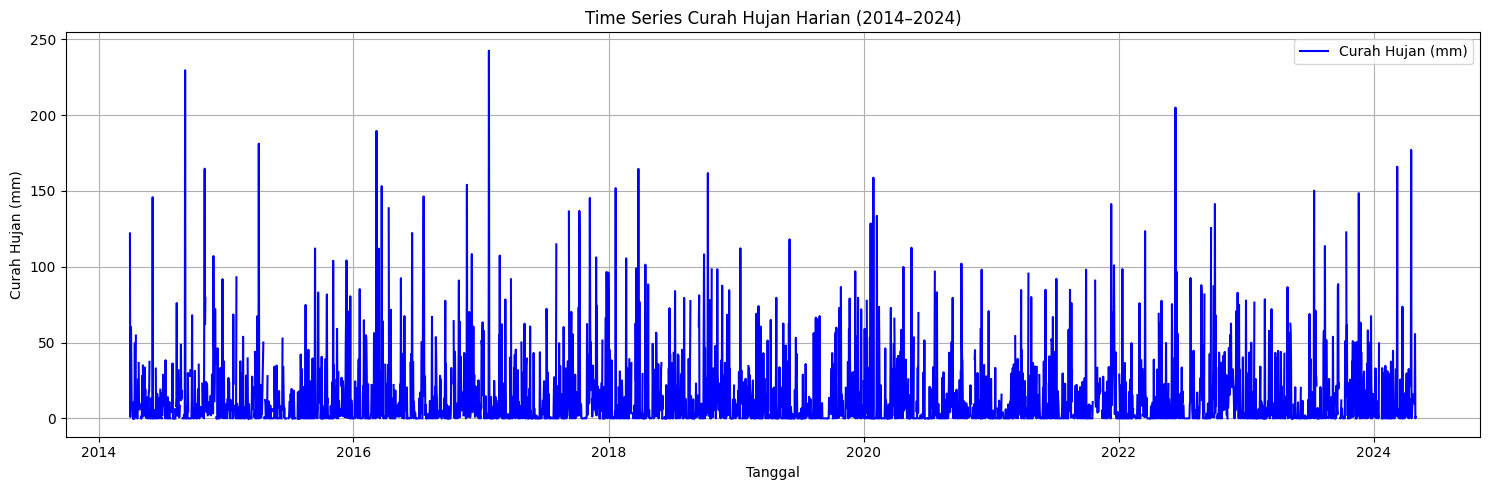

In [5]:
import seaborn as sns

# Grafik time series curah hujan harian
plt.figure(figsize=(15, 5))
plt.plot(df['tanggal'], df['rr'], label='Curah Hujan (mm)', color='blue')
plt.title('Time Series Curah Hujan Harian (2014–2024)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


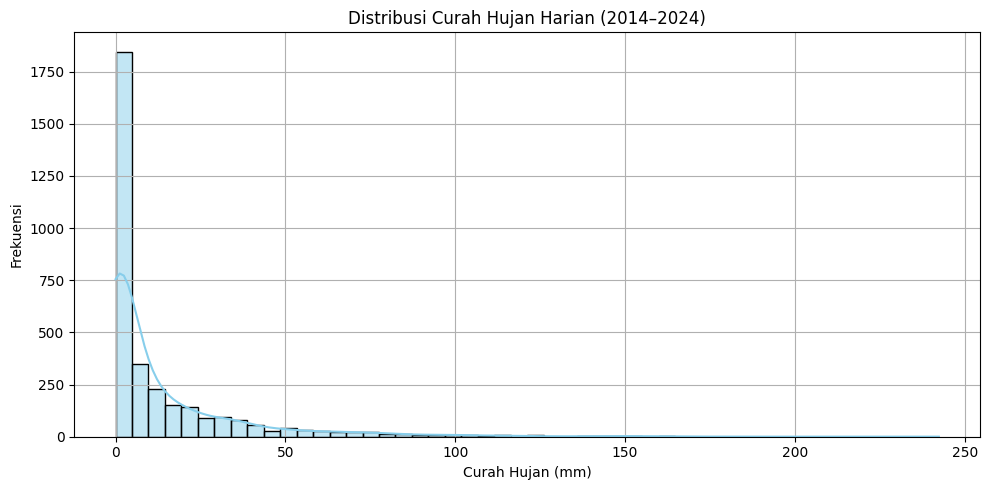

In [6]:
# Histogram Distribusi Curah Hujan Harian
plt.figure(figsize=(10, 5))
sns.histplot(df['rr'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Curah Hujan Harian (2014–2024)')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()


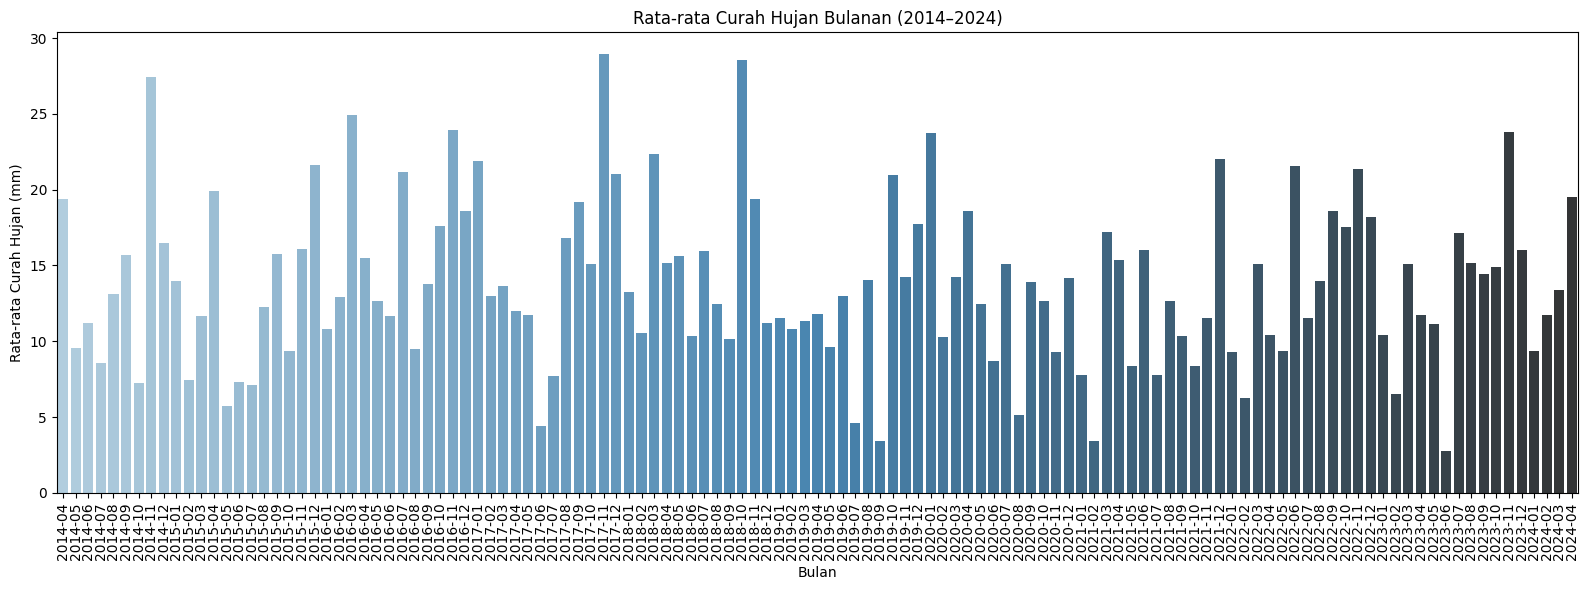

In [7]:
# Bar Chart Rata-rata Curah Hujan Bulanan
# Tambahkan kolom bulan-tahun
df['bulan'] = df['tanggal'].dt.to_period('M')
monthly_avg = df.groupby('bulan')['rr'].mean().reset_index()
monthly_avg['bulan'] = monthly_avg['bulan'].astype(str)

plt.figure(figsize=(16, 6))
sns.barplot(x='bulan', y='rr', data=monthly_avg, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Rata-rata Curah Hujan Bulanan (2014–2024)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Curah Hujan (mm)')
plt.tight_layout()
plt.show()

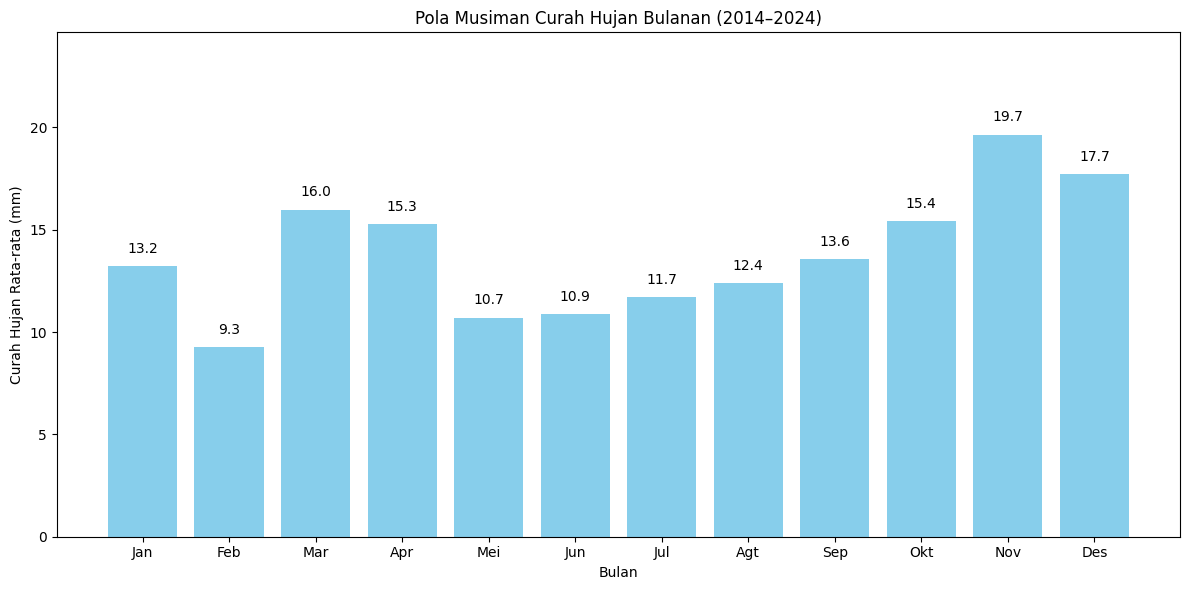

In [8]:
# Mapping manual nama bulan dalam Bahasa Indonesia
nama_bulan_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Agt',
    9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
}

# Tambahkan kolom bulan (angka) dan nama bulan
df['angka_bulan'] = df['tanggal'].dt.month
df['nama_bulan'] = df['angka_bulan'].map(nama_bulan_dict)

# Hitung rata-rata curah hujan per bulan
bulan_avg = df.groupby(['angka_bulan', 'nama_bulan'])['rr'].mean().reset_index()
bulan_avg = bulan_avg.sort_values('angka_bulan')

# Visualisasi
plt.figure(figsize=(12, 6))
bars = plt.bar(bulan_avg['nama_bulan'], bulan_avg['rr'], color='skyblue')
plt.title('Pola Musiman Curah Hujan Bulanan (2014–2024)')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan Rata-rata (mm)')
plt.ylim(0, bulan_avg['rr'].max() + 5)

# Tambahkan label nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
